<a href="https://colab.research.google.com/github/SKM1978/Deep_Learning_Tutorial/blob/master/Telco_Customer_Churn_Prediction_using_ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

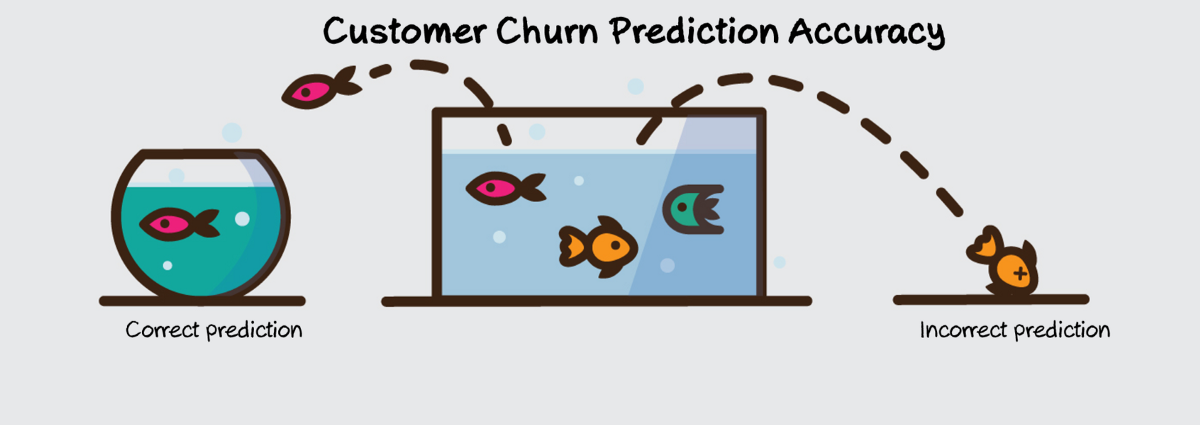

# Customer Churn Prediction in Retail

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/Telco_Customer_Churn_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Is there any missing value?

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Checking the balance of the Churn dataset

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.groupby('Churn')['MonthlyCharges'].mean()

# Customers with higher MonthlyCharges are more likely to churn

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [9]:
df.groupby(['gender','Churn'])['customerID'].count()

# Gender doesn't influence Churn in any significant level

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: customerID, dtype: int64

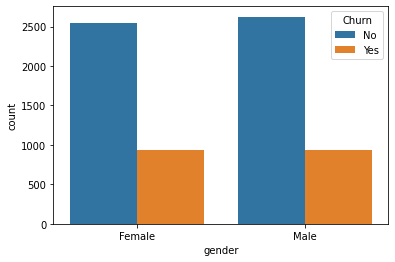

In [10]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

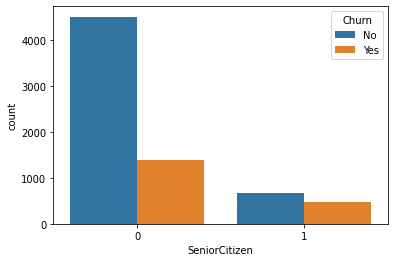

In [11]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

# SeniorCitizen churns at a higher rate

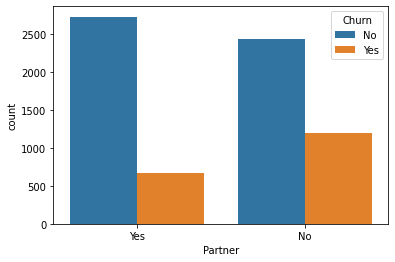

In [12]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

# If there is a Partner, Churn rate is lower

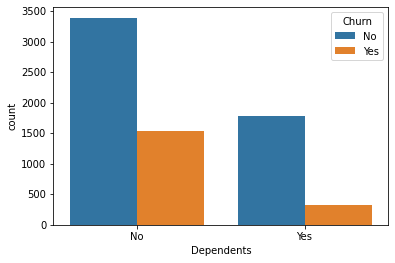

In [13]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

# Rate of churn among customers who have dependents is not much different from those who don't have them

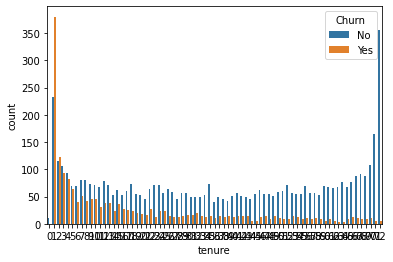

In [14]:
sns.countplot(x='tenure', hue='Churn', data=df)
plt.show()

# customers with higher tenure are less likely to churn

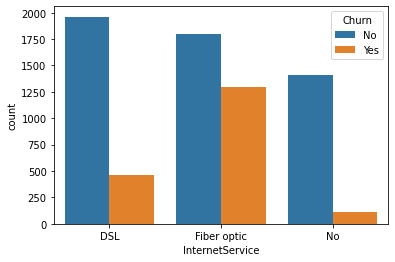

In [15]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

# customers with Fiber optic based internet service are more likely to churn

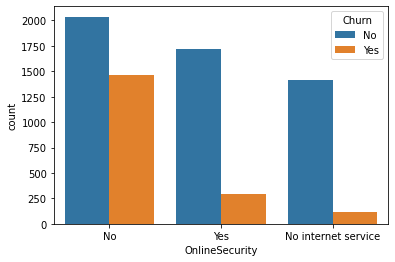

In [16]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.show()

# Customers with no online security are more likely to churn

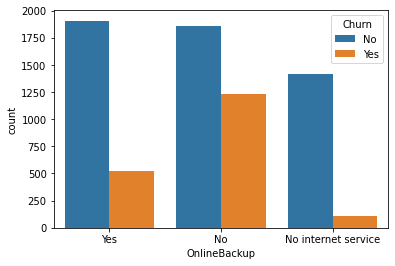

In [17]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.show()

# customers with no online backup are more likely to churn

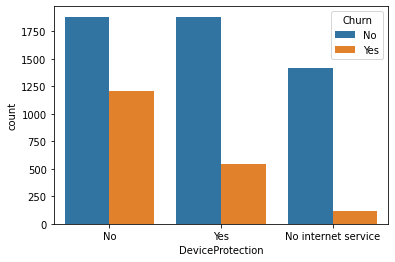

In [18]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.show()

# customers with no device protection are more likely to churn

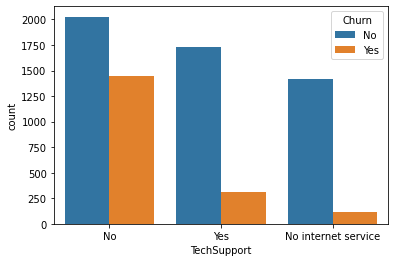

In [19]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.show()

# customers with no tech support are more likely to churn

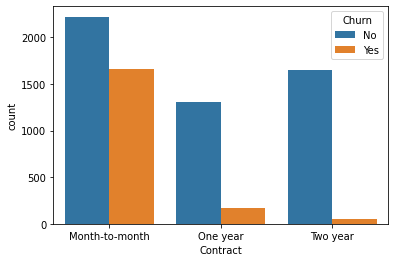

In [20]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

# customers with Month-to-Month contract are more likely to churn

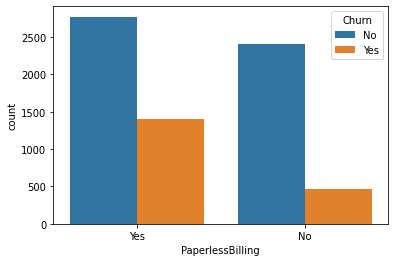

In [21]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

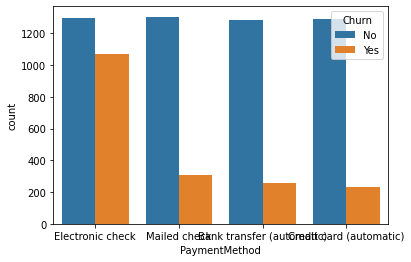

In [22]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.show()

# customers with Electronic check are more likely to churn

In [23]:
# Will drop some of the features that don't influence churn

data=df.drop(['customerID','gender','Dependents','PhoneService','MultipleLines','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling','TotalCharges'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    7043 non-null   int64  
 1   Partner          7043 non-null   object 
 2   tenure           7043 non-null   int64  
 3   InternetService  7043 non-null   object 
 4   OnlineSecurity   7043 non-null   object 
 5   OnlineBackup     7043 non-null   object 
 6   TechSupport      7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   PaymentMethod    7043 non-null   object 
 9   MonthlyCharges   7043 non-null   float64
 10  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 605.4+ KB


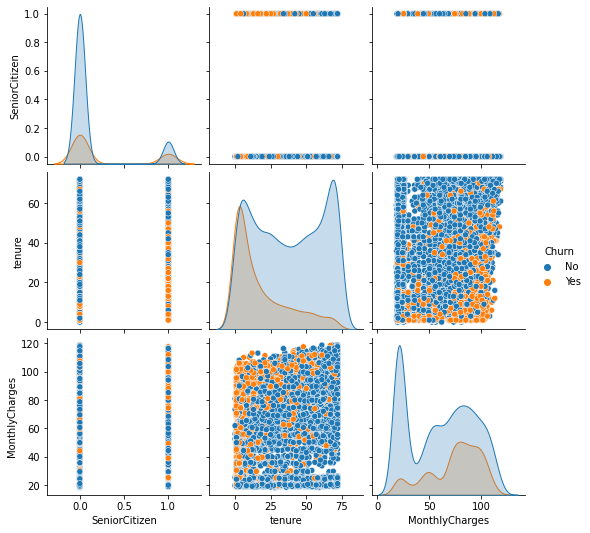

In [24]:
sns.pairplot(data, hue='Churn')
plt.show()

## One Hot Encoding

In [25]:
data=pd.get_dummies(data, drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,34,56.95,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,2,53.85,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1
3,0,45,42.30,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
4,0,2,70.70,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


## Scaling and Standardization

In [26]:
y=data['Churn_Yes']

x=data.drop('Churn_Yes', axis=1)

x.shape, y.shape

((7043, 17), (7043,))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.439916,-1.277445,-1.160323,1.034530,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.639439,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.966622,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,-0.639439,1.944582,-0.562975,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.966622,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.639439,-0.514249,-0.562975,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.966622,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.563872,1.944582,-0.562975,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.966622,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.639439,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,1.034530,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.563872,1.944582,-0.562975,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,1.034530,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.639439,1.944582,-0.562975,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,1.034530,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,-0.639439,-0.514249,-0.562975,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,1.034530,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.639439,-0.514249,-0.562975,-0.525047,-0.711026,1.835513


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4718, 17), (2325, 17), (4718,), (2325,))

## Deep Learning network

In [29]:
import keras
from keras.models import Sequential

model=Sequential()

In [30]:
from keras.layers import Dense
from keras.layers import Dropout

### Input Layer

In [38]:
model.add(Dense(200, activation='relu', input_dim=17))

### Hidden Layers

In [61]:
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

### Output Layer

In [62]:
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics='accuracy')

In [64]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
148/148 [==============================] - 3s 11ms/step - loss: 0.6284 - accuracy: 0.7291
Epoch 2/200
148/148 [==============================] - 2s 11ms/step - loss: 0.5670 - accuracy: 0.7304
Epoch 3/200
148/148 [==============================] - 2s 11ms/step - loss: 0.5335 - accuracy: 0.7304
Epoch 4/200
148/148 [==============================] - 2s 11ms/step - loss: 0.4900 - accuracy: 0.7319
Epoch 5/200
148/148 [==============================] - 2s 11ms/step - loss: 0.4456 - accuracy: 0.7590
Epoch 6/200
148/148 [==============================] - 2s 11ms/step - loss: 0.4056 - accuracy: 0.8061
Epoch 7/200
148/148 [==============================] - 2s 11ms/step - loss: 0.3954 - accuracy: 0.8158
Epoch 8/200
148/148 [==============================] - 2s 11ms/step - loss: 0.3865 - accuracy: 0.8141
Epoch 9/200
148/148 [==============================] - 2s 11ms/step - loss: 0.3837 - accuracy: 0.8177
Epoch 10/200
148/148 [==============================] - 2s 11ms/step - loss: 0.381

In [65]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.4

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1467  261]
 [ 237  360]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1728
           1       0.58      0.60      0.59       597

    accuracy                           0.79      2325
   macro avg       0.72      0.73      0.72      2325
weighted avg       0.79      0.79      0.79      2325



## Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

ml_model=RandomForestClassifier()

ml_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_pred_ml=ml_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_ml))
print(confusion_matrix(y_test, y_pred_ml))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1728
           1       0.59      0.52      0.56       597

    accuracy                           0.78      2325
   macro avg       0.72      0.70      0.71      2325
weighted avg       0.78      0.78      0.78      2325

[[1513  215]
 [ 285  312]]


We get a higher F1 score in DL. Hence, the neural network has done a better job over ML model.